In [9]:
from ydata_profiling import ProfileReport
import pandas as pd
import seaborn as sns
sns.set_style()

%matplotlib inline


In [2]:
df_acceptance = pd.read_csv("data/Globepay Acceptance Report..csv", delimiter=";")
df_chargeback = pd.read_csv("data/Globepay Chargeback Report ..csv")

In [3]:
df_acceptance.head()

,external_ref,status,source,ref,date_time,state,cvv_provided,amount,country,currency,rates
0,nCyEIIGaP5QQ2Wqb-_Rt8,True,GLOBALPAY,evt_1ESgcCOV7fY1ChY1MkZizZt,2019-01-01T00:00:00.000Z,DECLINED,False,1020.46,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."
1,ptNiI9B7NNpK7VsMZx6zZ,True,GLOBALPAY,evt_1EBMGCEjEtianKMJaZXOx1y,2019-01-01T04:48:00.000Z,ACCEPTED,False,1582.57,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."
2,1GS5BDKBnauCt-3nHPs6x,True,GLOBALPAY,evt_1EOALu0AZqEhZBn9ub_nbcE,2019-01-01T09:36:00.000Z,DECLINED,False,1653.07,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."
3,Y_oecYz8GjBDaxmMqkkLQ,True,GLOBALPAY,evt_1ESHsWyaSPqE1mrmJ2B6rvs,2019-01-01T14:24:00.000Z,ACCEPTED,False,2228.17,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."
4,LlEs1TnKVa2xX6PH9Zsz0,True,GLOBALPAY,evt_1EjzPk13qLzmvDR_4hXuMMw,2019-01-01T19:12:00.000Z,ACCEPTED,False,2589.92,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."


In [4]:
df_chargeback.head()

,external_ref,status,source,chargeback
0,_-UTDS0dMlagMWEtQKMy-,True,GLOBALPAY,False
1,_0fqf75KiPa0iiviKCSsU,True,GLOBALPAY,False
2,_0H9Ecd_RctsLetId-p14,True,GLOBALPAY,False
3,_0wBrMzAzIhO3fQRWUcBH,True,GLOBALPAY,False
4,_25jZuGDrmwUEdAwKp1xV,True,GLOBALPAY,False


In [5]:
report_acceptance = ProfileReport(df_acceptance, title="Acceptance Report")
report_chargeback = ProfileReport(df_chargeback, title="Chargeback Report")

report_acceptance.to_file("report_acceptance.html")
report_chargeback.to_file("report_chargeback.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 522.26it/s]


# Some first remarks after EDA
- No missing values in any column
- status and source columns are constant and can be ignored for this analysis
- external ref and ref columns are unique ids. external_ref of chargeback report and 
- dates provided between 01/01/2019 and 30/01/2029 (Q1 + Q2 2019)
- state var can be changed to a boolean "is_accepted"
- cvv_provided == True in <1% of cases
- AE likely charged in USD. Therefore the information provided by currency is contained in the country column.
- rates (still json format) are 20% distinct values, will look into it later if needed
- chargeback rate of 4.1% overall 
- The potentially relevant dimensions for this analysis are "date_time", "state", "cvv_provided", "amount", "country", "rates", "chargeback"

In [6]:
df_merged = df_chargeback[["external_ref", "chargeback"]].merge(df_acceptance, how="outer", on="external_ref")

# Check if merge successfull
assert df_merged.isnull().sum().sum() == 0

In [7]:
df = df_merged[["date_time", "state", "cvv_provided", "amount", "country", "rates", "chargeback"]]

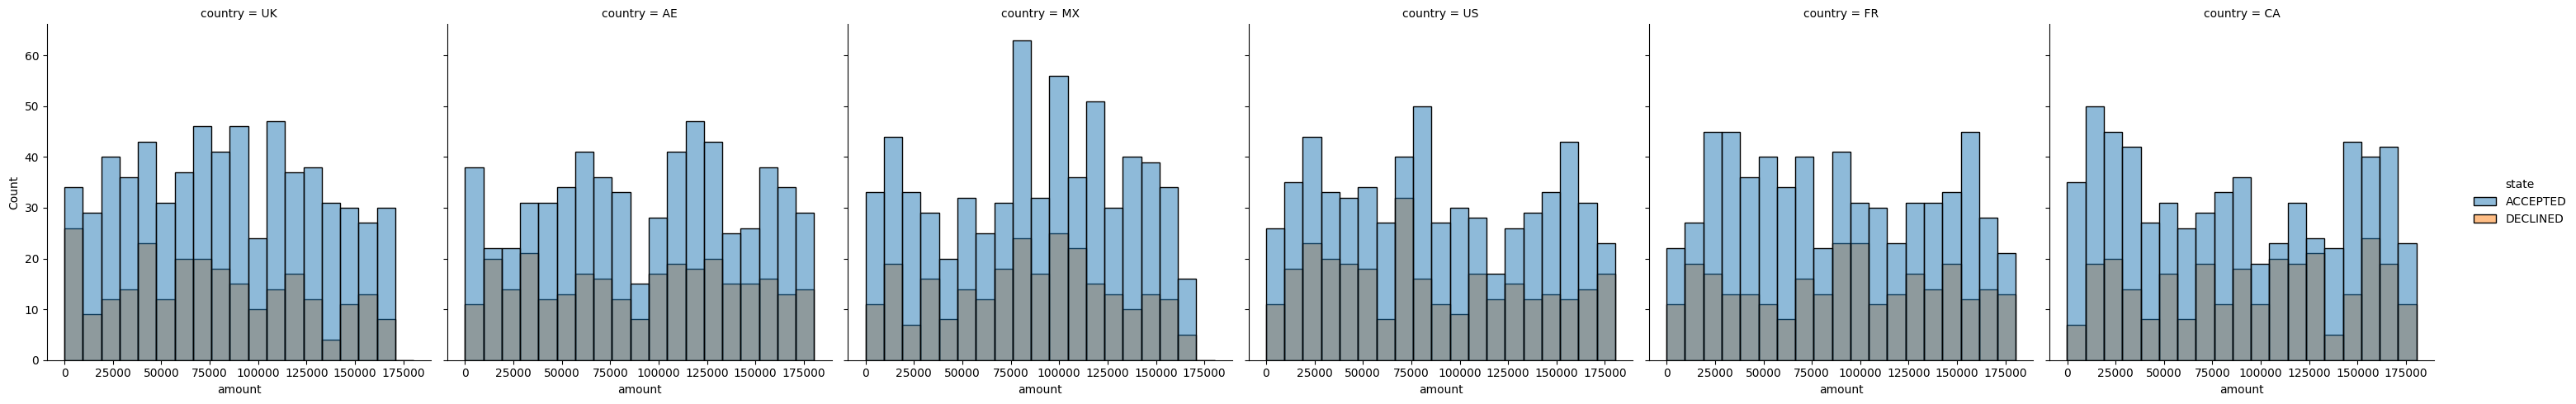

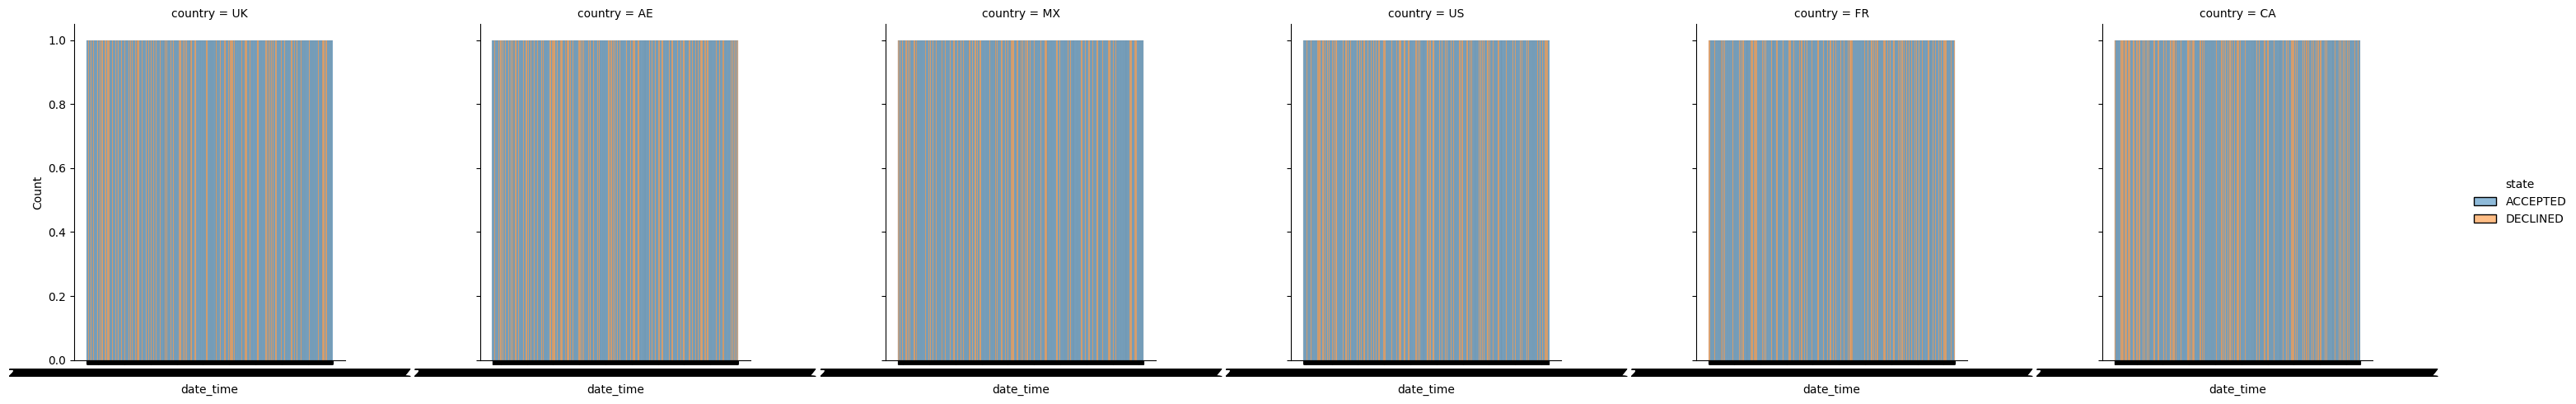

In [16]:
# Ignore cvv_provided and rates here
# sns.displot(df_merged, x="date_time", y="amount", hue="chargeback", col="country", row="state")
sns.displot(df_merged, x="amount", hue="state", col="country")


In [ ]:
# Takeaways Refusals do not seem to depend on the country, nor the amount

AttributeError: Rectangle.set() got an unexpected keyword argument 'bin'

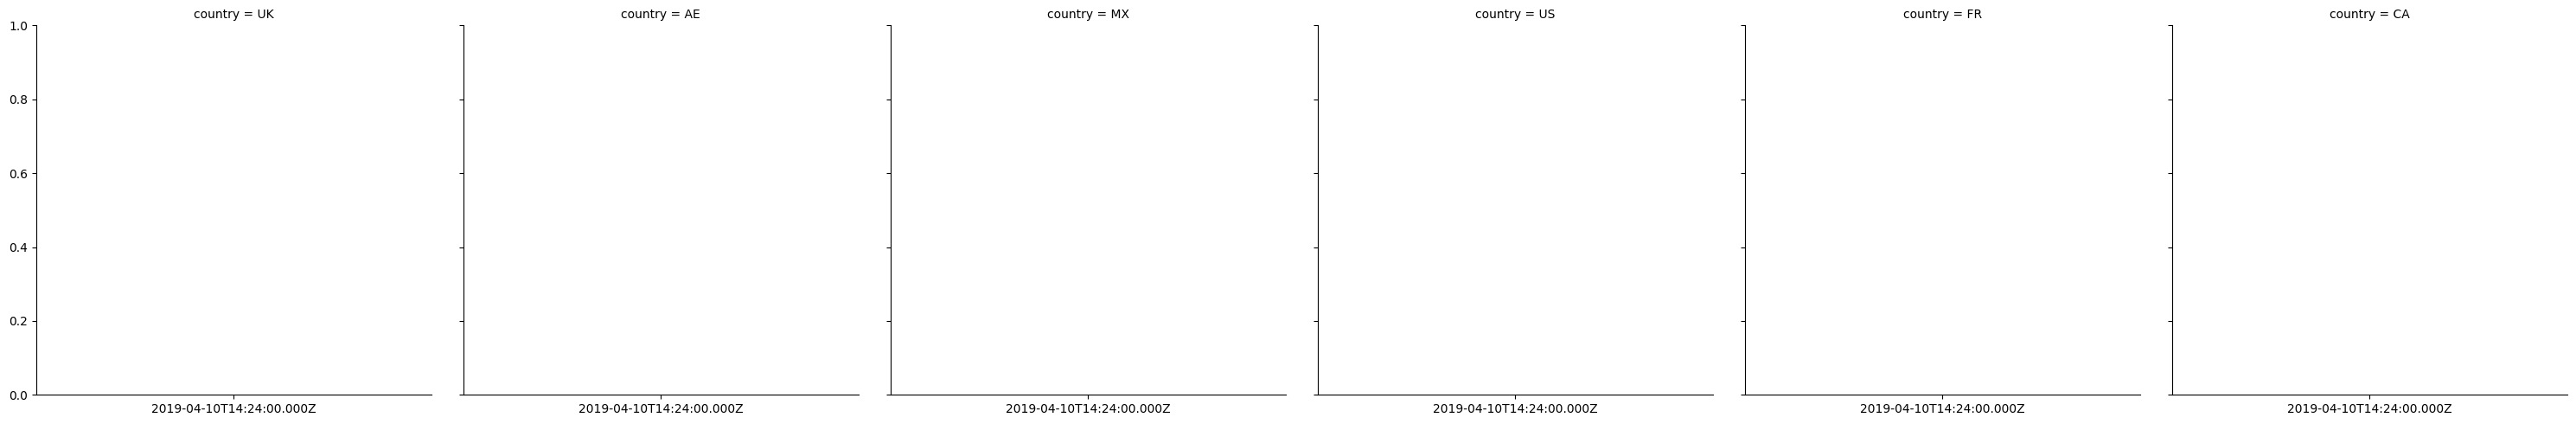

In [ ]:
sns.displot(df_merged, x="date_time", hue="state", col="country")
